In [1]:
import cv2

In [2]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [16]:
img = cv2.imread('IMG_20151105_060521.jpg')

In [17]:
vals = im.mean(axis=2).flatten()

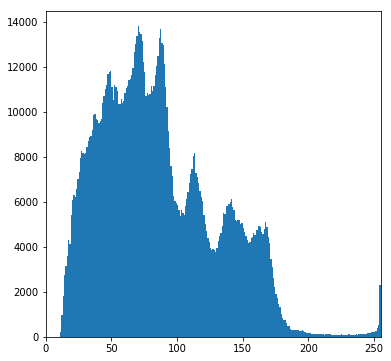

In [18]:
b, bins, patches = plt.hist(vals, range(256))
plt.xlim([0,255])
plt.show()

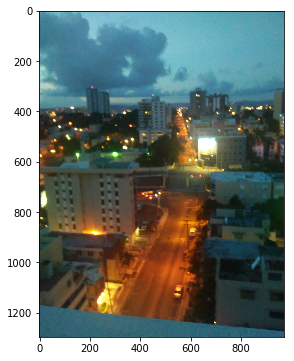

In [22]:
plt.imshow(img[:,:,[2,1,0]])

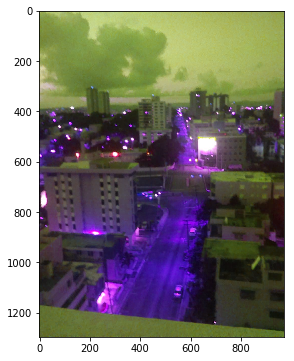

In [23]:
plt.imshow(img[:,:,[1,0,2]])

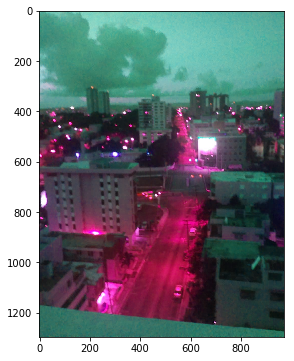

In [24]:
plt.imshow(img[:,:,[2,0,1]])

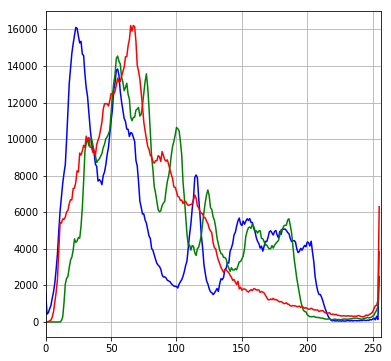

In [27]:
color = ['b', 'g', 'r']

for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

plt.grid(True)
plt.show()

In [28]:
img.shape

(1296, 972, 3)

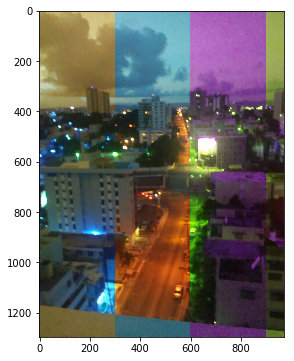

In [38]:
img2 = np.hstack([img[:,:300,[0,1,2]], img[:,300:600,[2,1,0]], img[:,600:900,[1,2,0]],img[:,900:,[1,0,2]]])
plt.imshow(img2)

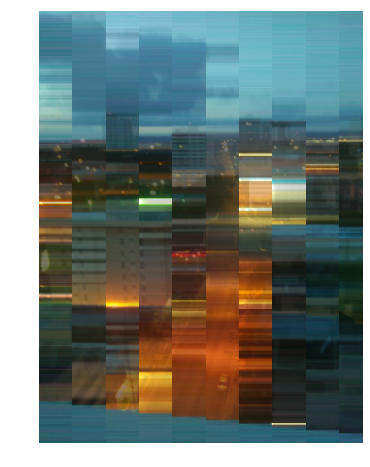

In [79]:
img3 = (1.0*img).astype(int)
N = 100
img3[:,:,:] =  img[:,N*(np.arange(972)//N),:]
img3 = (0.75*img3[:,:,[2,1,0]] + 0.25*img[:,:,[2,1,0]]).astype(int)
plt.axis("Off")
plt.subplots_adjust(left=0, right=1,top=1,bottom=0,wspace=0,hspace=0)
plt.imshow(img3)
plt.savefig("cityscape-01.png", bbox_inches="tight", pad_inches=0)

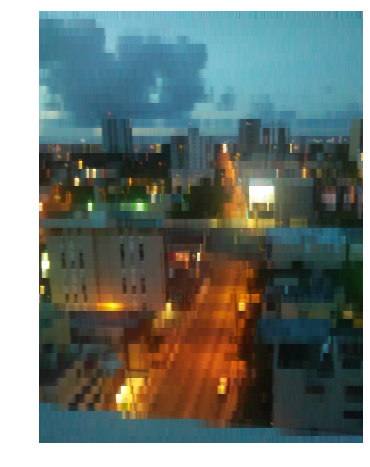

In [78]:
img3 = (1.0*img).astype(int)
N = 25
img3[:,:,:] =  img[N*(np.arange(1296)//N),:,:]
img3 = (0.75*img3[:,:,[2,1,0]] + 0.25*img[:,:,[2,1,0]]).astype(int)
plt.axis("Off")
plt.subplots_adjust(left=0, right=1,top=1,bottom=0,wspace=0,hspace=0)
plt.imshow(img3)
plt.savefig("cityscape-02.png", bbox_inches="tight", pad_inches=0)

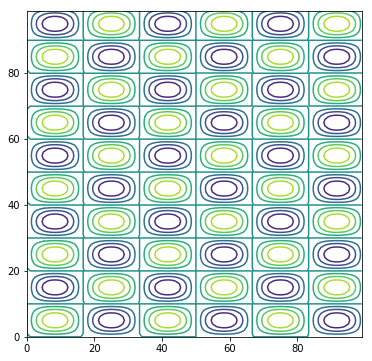

In [84]:
x = np.arange(0,1,0.01)

z0 = np.sin(2*np.pi*3*x[None,...])*np.sin(2*np.pi*5*x[...,None])

plt.contour(z0)

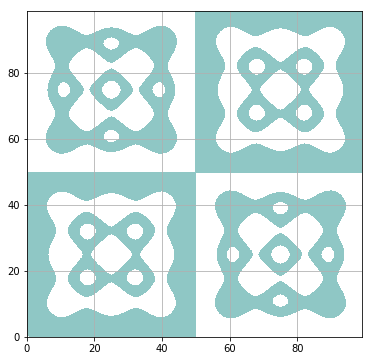

In [129]:
x = np.arange(0,1,0.01)


a = 2*(np.random.random((5,5)) - 0.5)

z = 0*x[None,...]*x[...,None]

for (m,n) in [(1,7),(7,1)]:
    z += (1 - 0.00*np.random.random())*np.sin(2*np.pi*m*x[None,...])*np.sin(2*np.pi*n*x[...,None])


plt.contourf(z, levels=[0,1.25], alpha=0.5)
plt.grid(True)

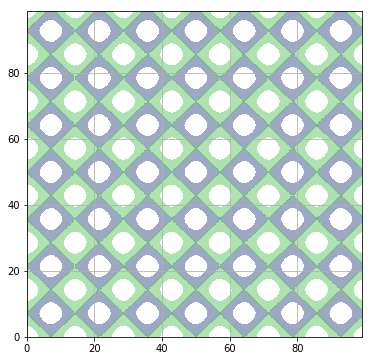

In [137]:
x = np.arange(0,1,0.01)


a = 2*(np.random.random((5,5)) - 0.5)

z = 0*x[None,...]*x[...,None]

for (m,n) in [(7,0),(0,7)]:
    z += (1 - 0.00*np.random.random())*np.cos(2*np.pi*m*x[None,...])*np.cos(2*np.pi*n*x[...,None])


plt.contourf(z, levels=[-1,0,1], alpha=0.5)
plt.grid(True)

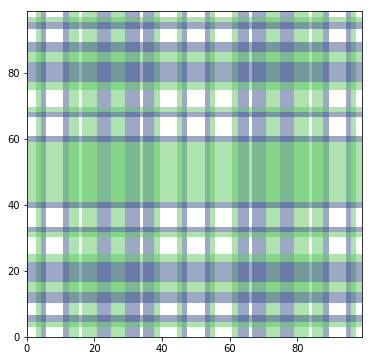

In [140]:
x = np.arange(0,1,0.01)


a = 2*(np.random.random((5,5)) - 0.5)

z = 0*x[None,...]*x[...,None]

for (m,n) in [(7,0), (5,0)]:
    z += (1 - 0.00*np.random.random())*np.cos(2*np.pi*m*x[None,...])*np.cos(2*np.pi*n*x[...,None])
   
plt.contourf(z, levels=[-1,0,1], alpha=0.5)

z = 0*x[None,...]*x[...,None]

for (m,n) in [(0,7), (0,4)]:
    z += (1 - 0.00*np.random.random())*np.cos(2*np.pi*m*x[None,...])*np.cos(2*np.pi*n*x[...,None])

plt.contourf(z, levels=[-1,0,1], alpha=0.5)
#plt.grid(True)

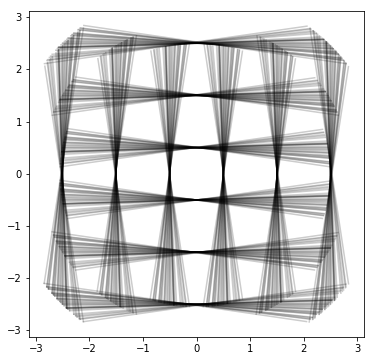

In [155]:
t = np.arange(0,1,0.01)

for b in range(30):
    theta = (np.random.random()-0.5)*0.05
    z0 = np.exp(2j*np.pi*theta)
    for a in range(6):
        z = a*1j+5*t - 2.5*(1 + 1j)
        z = z0*z
        plt.plot(z.real, z.imag, 'k-', alpha=0.2)
        z = a*1+5j*t - 2.5*(1 + 1j)
        z = z0*z
        plt.plot(z.real, z.imag, 'k-', alpha=0.2)

(-0.5, 639.5, 639.5, -0.5)

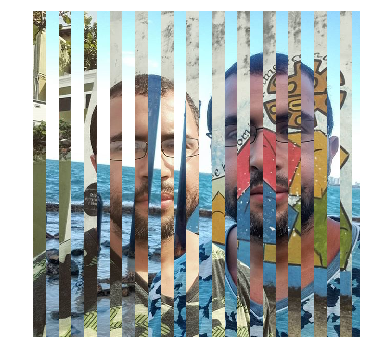

In [410]:
N = 640

n = np.arange(N)

L  = 25
fx = 1*( (n//L)%2 == 0 )
fy = 1 + 0*n
fxy = 1*(((n[None,...]//L)%2 + (n[...,None]//L%2 )) %2 == 0)
#f = fxy[...,None]*(1 + np.zeros(3))[None,...]
f = fx[None,...,None]*fy[...,None,None]*(1 + np.zeros(3))[None,None,...]
gx = 1*( (n//L)%2 == 1 )
gy = 1 + 0*n
gxy = 1*(((n[None,...]//L)%2 + (n[...,None]//L%2 )) %2 == 1)
#g = gxy[...,None]*(1 + np.zeros(3))[None,...]
g = gx[None,...,None]*gy[...,None,None]*(1 + np.zeros(3))[None,None,...]

img1 = cv2.imread("me-05.jpg")[:640,:640,:]
img2 = cv2.imread("me-06.jpg")[:640,:640,:]
img3 = (img1[:,:,[2,1,0]]*f + img2[:,:,[2,1,0]]*g)
img  = (0.0*img2 + 1.00*img3).astype(int) 
plt.imshow(img)   
plt.axis("Off")

In [361]:
np.max(fxy)

1

In [354]:
n = np.arange(N)
1*( (n//10)%2 == 1 )
#img1[:,:,[0,1,2]]*f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

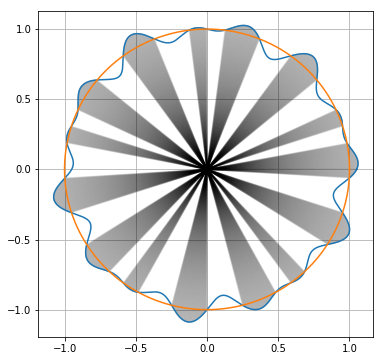

In [206]:
# an EKG

# a beer mug

t = np.arange(0,1,0.0001)

z = (1 + 0.05*(np.sin(20*np.pi*t)+ np.cos(30*np.pi*t)))*np.exp(2j*np.pi*t)

f = lambda t : np.abs((1 + 0.05*(np.sin(20*np.pi*t)+ np.cos(30*np.pi*t)))*np.exp(2j*np.pi*t))

T = t[(np.abs(z) > 1)]

for theta in T[::5]:
    #print(theta)
    plt.plot([0,f(theta)*np.cos(2*np.pi*theta)], [0, f(theta)*np.sin(2*np.pi*theta)], 'k-', alpha=0.1)
    

plt.plot(z.real, z.imag, '-')

z = np.exp(2j*np.pi*t)

plt.plot(z.real,z.imag,'-')
plt.grid(True)

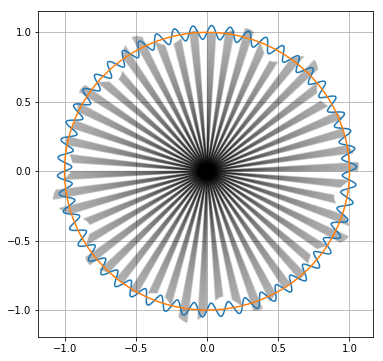

In [207]:
# a gear

t = np.arange(0,1,0.0001)

z = (1 + 0.05*(np.sin(100*np.pi*t)))*np.exp(2j*np.pi*t)
f = lambda t : np.abs((1 + 0.05*(np.sin(20*np.pi*t)+ np.cos(30*np.pi*t)))*np.exp(2j*np.pi*t))

T = t[(np.abs(z) > 1)]

for theta in T[::5]:
    #print(theta)
    plt.plot([0,f(theta)*np.cos(2*np.pi*theta)], [0, f(theta)*np.sin(2*np.pi*theta)], 'k-', alpha=0.1)
    

plt.plot(z.real, z.imag, '-')

z = np.exp(2j*np.pi*t)

plt.plot(z.real,z.imag,'-')
plt.grid(True)

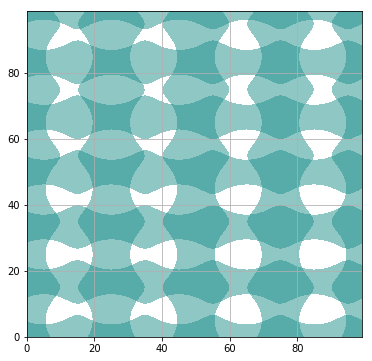

In [270]:
x = np.arange(0,1,0.01)


a = 2*(np.random.random((5,5)) - 0.5)

z  = 0*x[None,...]*x[...,None]
z += (0 + 1.0*np.sin(2*np.pi*2*x[None,...]))*(1 + 0.2*np.sin(2*np.pi*5*x[...,None]))
 
plt.contourf(z, levels=[-0.75,0.75], alpha=0.5)
    
z  = 0*x[None,...]*x[...,None]
z += (1 + 0.2*np.sin(2*np.pi*5*x[None,...]))*(0 + 1.0*np.sin(2*np.pi*3*x[...,None]))

plt.contourf(z, levels=[-0.75,0.75], alpha=0.5)
plt.grid(True)

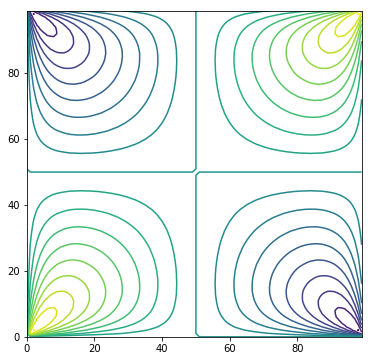

In [316]:
n = np.arange(0,100+1)
N = n[None,...] + 1j*n[...,None]


t = np.arange(0,1,0.01)

z = 0*(t[None,...] + t[...,None])

for m in N[ (N.real**2 + N.imag**2 <100**2)]:
    z += (1/(np.abs(m)**2 + 0.001))*np.sin(2*np.pi*m.real*t[None,...])*np.sin(2*np.pi*m.imag*t[...,None])
    
plt.contour(z, np.arange(-1,1,0.1))

In [298]:
np.max(z)

0.922859034052535